Title: A prediction of the presence of heart disease using sex, serum cholesterol levels, resting blood pressure, and maximum heart rate variables in patients in Cleveland and Switzerland using the Heart Disease dataset

Introduction:

In recent years, numerous studies have been conducted to evaluate the variables that might contribute to increasing the risk of heart disease in humans. Some variables that were studied before include high cholesterol levels which can create clots in the blood vessels, high blood pressure that can cause heart attacks, consistently increased heart rate that can cause ischaemic heart disease, and other factors like age and sex (1). 
The Heart Disease dataset (2) provides with sets of information on heart disease data collection done in Cleveland, Hungary, Switzerland and the VA Long Beach. The study aimed to explore the relationships between 14 attributed variables and the presence of heart disease.
Using this dataset, we aim to predict the diagnosis of heart disease with a computerized model using an R system based on sex, serum cholesterol levels, resting blood pressure, and maximum heart rate in patients in Cleveland and Switzerland. 

In [12]:
library(tidyverse)
library(tidymodels)
library(repr)

In [13]:
cleveland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/cleveland.data", col_names = FALSE, na = c("?"))
switzerland <- read_csv("https://raw.githubusercontent.com/Kooriryuu/dsci-100-project-group3/main/data/switzerland.data", col_names = FALSE, na = c("?"))
#cleveland <- read_csv("data/cleveland.data", col_names = FALSE, na = c("?"))
#switzerland <- read_csv("data/switzerland.data", col_names = FALSE, na = c("?"))

#cleveland
#switzerland

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 123 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [18]:
cleveland_select <- cleveland |>
    select(X2, X5, X4, X8, X14)
switzerland_select <- switzerland |>
    select(X2, X5, X4, X8, X14)
column_names <- c("sex", "serum_cholesterol", "resting_blood_pressure", "max_heart_rate", "heart_disease_present")
colnames(cleveland_select) <- column_names
colnames(switzerland_select) <- column_names

cleveland_select$heart_disease_present[cleveland_select$heart_disease_present >= 1] <- "Yes"
switzerland_select$heart_disease_present[switzerland_select$heart_disease_present >= 1] <- "Yes"
cleveland_select$heart_disease_present[cleveland_select$heart_disease_present == 0] <- "No"
switzerland_select$heart_disease_present[switzerland_select$heart_disease_present == 0] <- "No"
all_places <- rbind(cleveland_select, switzerland_select)
all_places_select <- mutate(all_places, sex = as_factor(sex), heart_disease_present = as_factor(heart_disease_present))
all_places_select





sex,serum_cholesterol,resting_blood_pressure,max_heart_rate,heart_disease_present
<fct>,<dbl>,<dbl>,<dbl>,<fct>
1,233,145,150,No
1,286,160,108,Yes
1,229,120,129,Yes
1,250,130,187,No
0,204,130,172,No
1,236,120,178,No
0,268,140,160,Yes
0,354,120,163,No
1,254,130,147,Yes


In [15]:
set.seed(77777) 
places_split <- initial_split(all_places_select, prop = 0.75, strata = heart_disease_present)
places_training <- training(places_split) 
places_testing <- testing(places_split) 



In [16]:
avg <-  places_training |>
    select(serum_cholesterol, resting_blood_pressure) |>
    map_df(mean, na.rm = TRUE) |>
    mutate(serum_cholesterol_avg = serum_cholesterol, resting_bp_avg = resting_blood_pressure) |>
    select(serum_cholesterol_avg, resting_bp_avg)

count0 <- places_training |>
    filter(heart_disease_present == "No") |>
    count() |>
    pull()
count1 <- places_training |>
    filter(heart_disease_present == "Yes") |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_people_no_disease = count0) |>
    mutate(num_people_w_disease = count1)
countM <- places_training |>
    filter(sex == 1) |>
    count() |>
    pull()
countF <- places_training |>
    filter(sex == 0) |>
    count() |>
    pull()
avg <- avg |>
    mutate(num_females = countF, num_males = countM, num_missing_data= sum(is.na(places_training)))
#cleveland_training
avg
#count

serum_cholesterol_avg,resting_bp_avg,num_people_no_disease,num_people_w_disease,num_females,num_males,num_missing_data
<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>
178.7179,130.3659,129,190,73,246,3


Warning message:
“Removed 2 rows containing missing values (geom_point).”


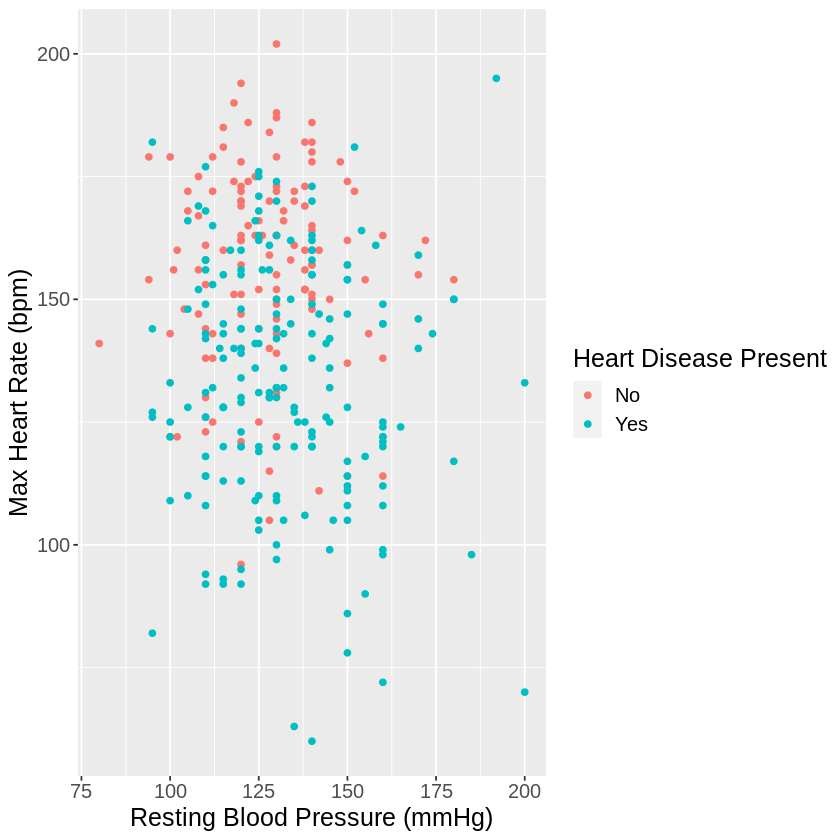

In [20]:
#all_places
distribution_plot <- ggplot(places_training, aes(x = resting_blood_pressure, y = max_heart_rate, colour = heart_disease_present)) +
    geom_point() +
    xlab("Resting Blood Pressure (mmHg)") +
    ylab("Max Heart Rate (bpm)") +
    labs(colour = "Heart Disease Present") +
    theme(text = element_text(size = 15))

distribution_plot

Methods:

First, as the dataset is in a zip file, we download and upload it into our public GitHub repository and download the dataset into this R notebook through the GitHub link.
Then, we read the dataset and select the columns that we want to analyze and change the names of the columns so that they are human-readable. The variables that we are using to answer our predictive question are sex, resting blood pressure, serum cholesterol, maximum heart rate, and diagnoses of heart disease out of the 14 attributes. Find below as a guide:
- sex*: (1 = male; 0 = female)
- serum_cholesterol: in mg/dl
- resting_blood_pressure: in mmHg on admission to the hospital
- max_heart_rate: maximum heart rate achieved
- heart_disease_present: diagnosis of heart disease (angiographic disease status) (Value 0: no heart disease (renamed to No), Value 1 and above: presence of heart disease (renamed to 1 and then to Yes))

After creating a training data set(75%) and testing data set(25%), we made a summarized table that reports the number of observations in each sex, the means of the predictor variables 'serum_cholesterol' and 'resting_blood_pressure', and number of rows that are missing data in the training data set to get an overview for future use for our prediction.
Lastly, we made a scatterplot to visualize the relationship between 'resting_blood_pressure' and 'max_heart_rate' and how they contribute to heart disease.

Expected outcomes and significance:

Based on previous studies available and before using the prediction model, we expect to find that individuals (especially female) with higher levels of serum cholesterol, resting blood pressure, and maximum heart rate to be at a higher risk for heart disease. Using analyzed data, we can determine how these factors influence heart disease, which one is a greator contributor, and their relationship to subsequently use this information to make therapeutics that can help with prevention of heart diseases.
This model can lead to questions like: How can we optimize our prediction model based on the significance of each variable on heart disease (determined by visualization)? Do the variables differ in terms of significance between different countries?

Notes:

*The sex representation in this dataset reflects how the data were historically collected and is not meant to imply that we believe that sex is binary.

Sources:

1- Wannamethee G., Shaper A. G. The association between heart rate and blood pressure, blood lipids and other cardiovascular risk factors. 1994. DOI: 10.1177/174182679400100307. Accessed on June 2023 through: https://pubmed.ncbi.nlm.nih.gov/7621302/

2- Heart Disease [data file]. DOI: 10.24432/C52P4X. Donated on 6/30/1988. Accessed on June 2023 through: https://archive.ics.uci.edu/dataset/45/heart+disease 
